In [13]:
import math
from collections import defaultdict
from pathlib import Path
import numpy as np
import torch
import matplotlib.pyplot as plt

from nnperm_utils import error_barrier_linspace_sample, error_barrier_from_losses


def load_values(save_dir: Path, level, epoch):
    values = defaultdict(list)
    for f in save_dir.glob("errors_*"):
        outputs = torch.load(f, map_location=torch.device("cpu"))
        _, i, j, lvl, ep = f.stem.split("_")
        if lvl == level and ep == epoch:
            values[f"rep_{i}"].append(int(i))
            values[f"rep_{j}"].append(int(j))
            for k, v in outputs.items():
                if k.endswith("_barriers"):
                    values[k[:-len("_barriers")]].append(np.mean(v, axis=1))
                    values[k].append(error_barrier_from_losses(v, reduction='mean'))
                else:
                    values[k].append(v)
    return values

def plot_mean_std(title, y, y_max):
    mean = np.mean(y, axis=0)
    std = np.std(y, axis=0)
    midpoint = len(mean) // 2
    x = error_barrier_linspace_sample(len(mean))
    plt.fill_between(x, mean - std, mean + std, alpha=0.3, color="grey")
    colors = plt.cm.viridis(np.linspace(0, 1, len(mean)))
    for line, color in zip(y, colors):
        plt.plot(x, line, c=color, alpha=0.7, linewidth=1)
    plt.plot(x, mean, color="grey", linestyle="dotted", linewidth=2)
    plt.title(f"{title} {mean[midpoint]:0.2f} {std[midpoint]:0.2f}")
    plt.xlabel("Interpolation alpha")
    plt.ylim([-0.7, y_max])
    plt.ylabel("Error barrier (cross entropy)")

def plot_error_barriers(barriers: dict, y_max: float, title: str):
    plt.figure(figsize=(4 * len(barriers), 4))
    for i, (k, v) in enumerate(barriers.items()):
        plt.subplot(1, len(barriers) + 1, i + 1)
        plot_mean_std(title + k[:-len("_barriers")], np.stack(v, axis=0), y_max)
    plt.show()

def plot_scale_hist(title, scales):
    scales = list(zip(*scales))
    plt.figure(figsize=(4 * len(scales), 4))
    for i, s in enumerate(scales):
        plt.subplot(1, len(scales) + 1, i + 1)
        if s[0] is not None:
            plt.hist(s)
    plt.title(title)
    plt.show()

def plot_from_dir(save_dir, level, epoch, title=None, ymax=None, plt_scale_hist=False):
    values = load_values(Path(save_dir), level, epoch)
    if len(values) == 0:
        print(f"Failed to load {save_dir}")
        return
    barriers = {k: v for k, v in values.items() if k.endswith("_barriers")}
    scales = {k: v for k, v in values.items() if k.startswith("scale_")}
    if plt_scale_hist:
        for k, v in scales.items():
            plot_scale_hist(k, v)
    if ymax is not None:
        plot_error_barriers(barriers, ymax, title)
    elif "574" in str(save_dir):
        plot_error_barriers(barriers, 1.4, title)
    else:
        plot_error_barriers(barriers, 7., title)

cifar_vgg_16_8


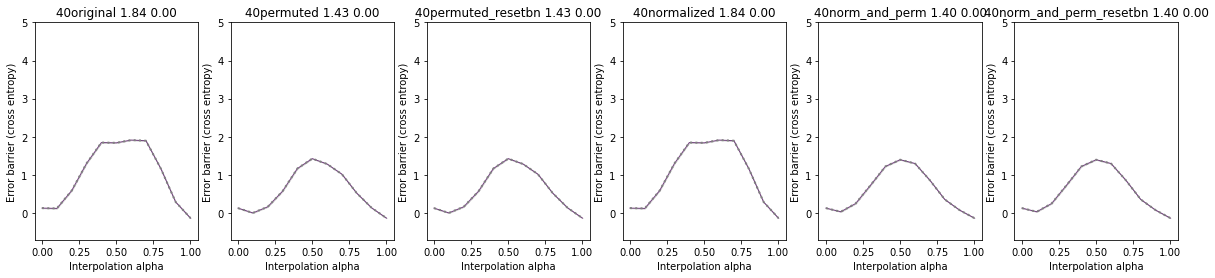

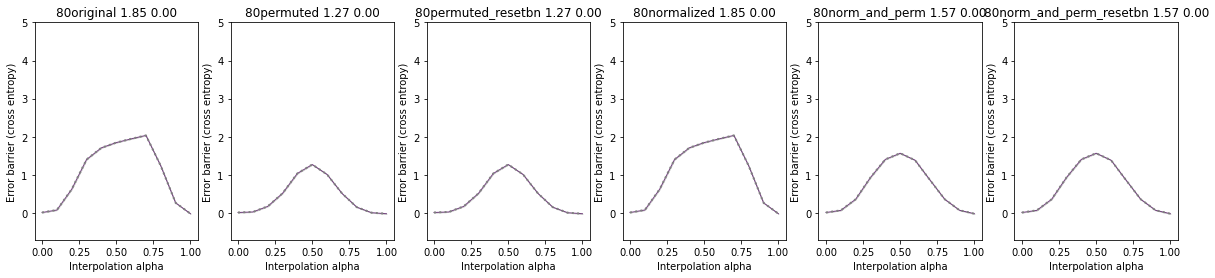

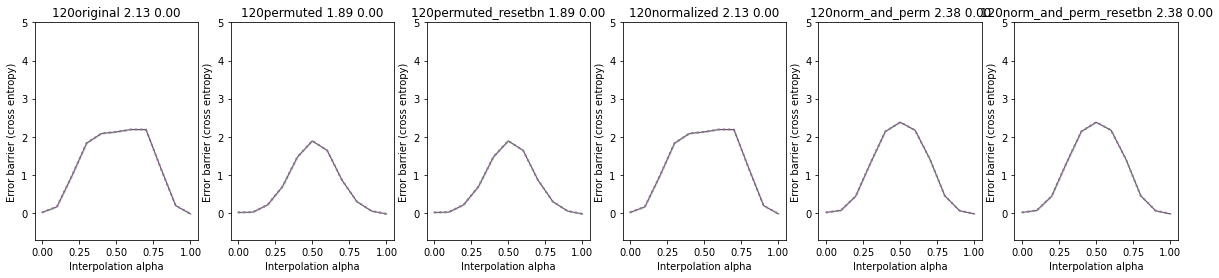

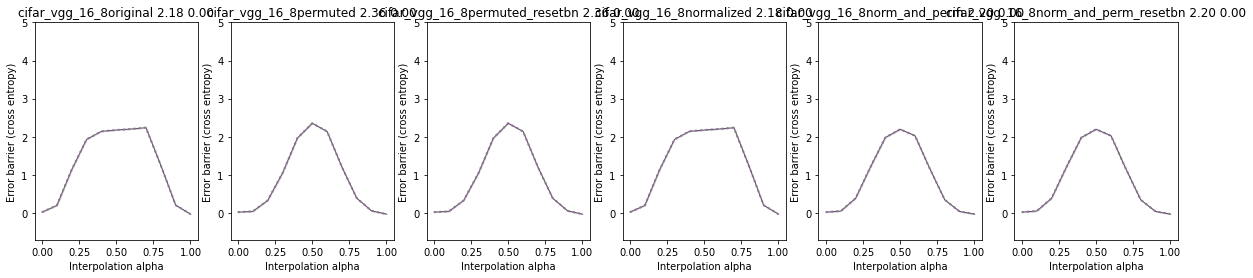

cifar_vgg_16_16


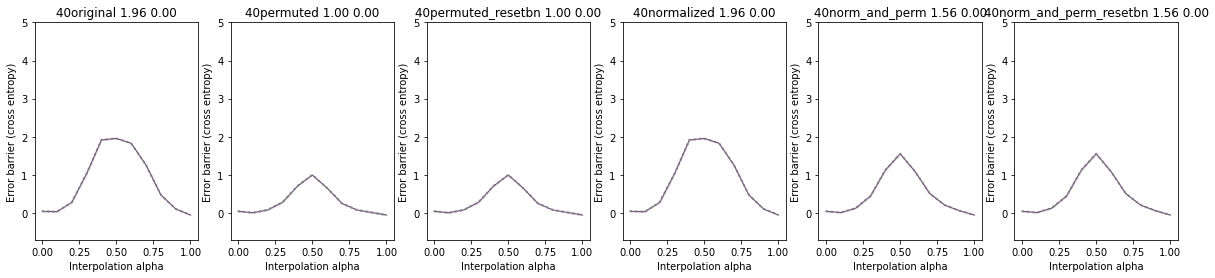

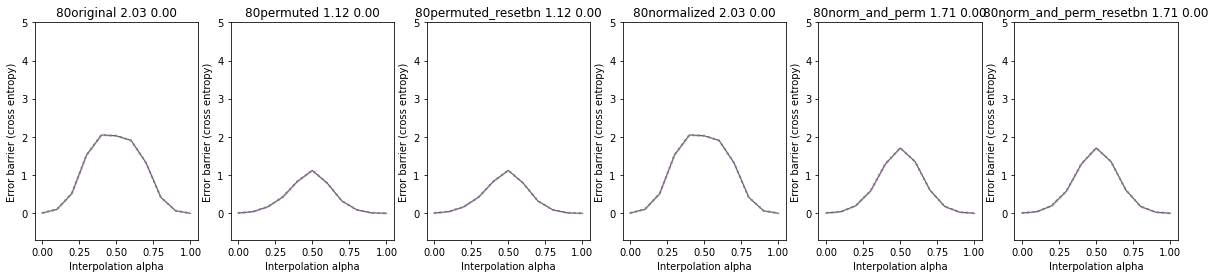

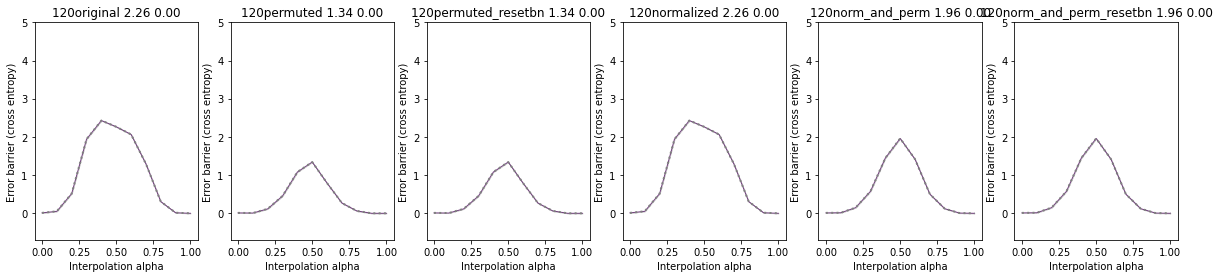

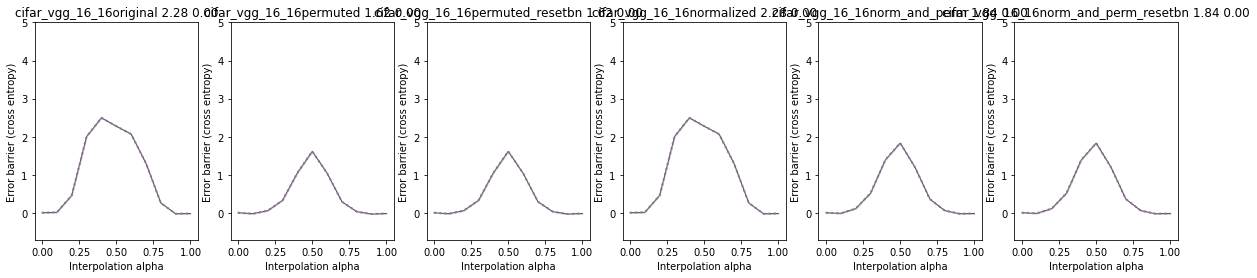

cifar_vgg_16_32


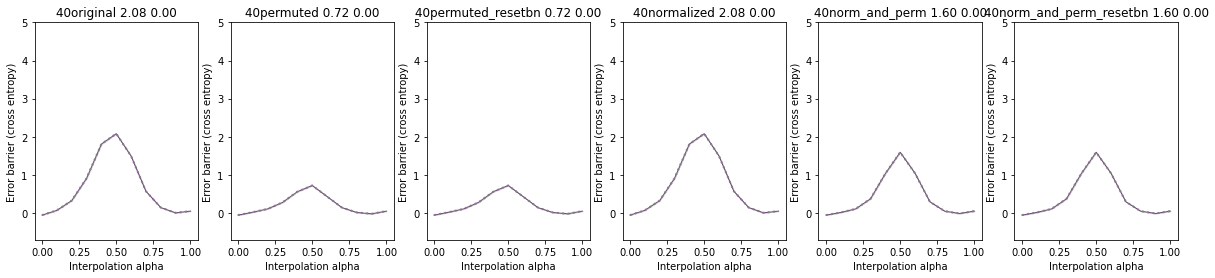

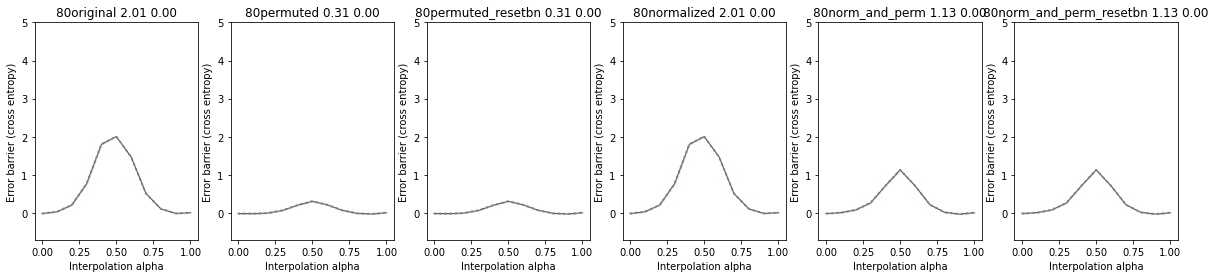

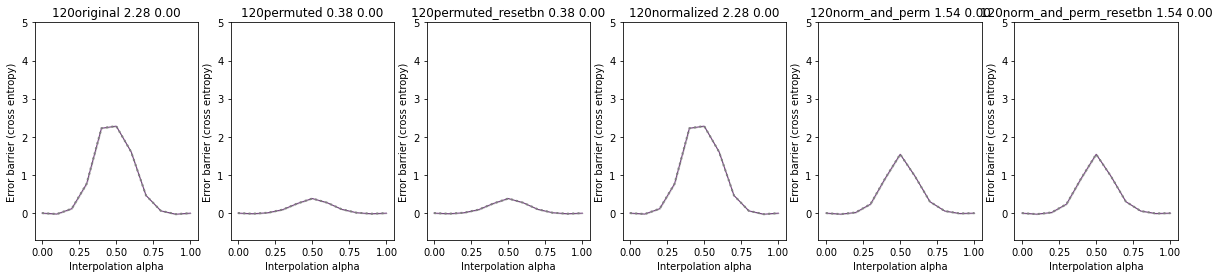

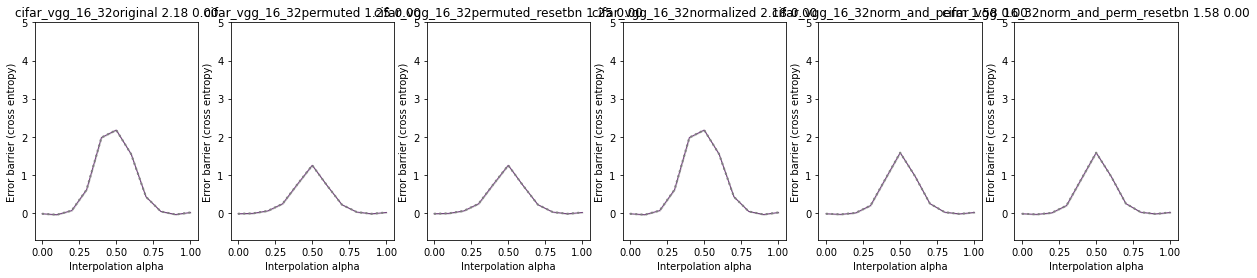

cifar_vgg_16_128


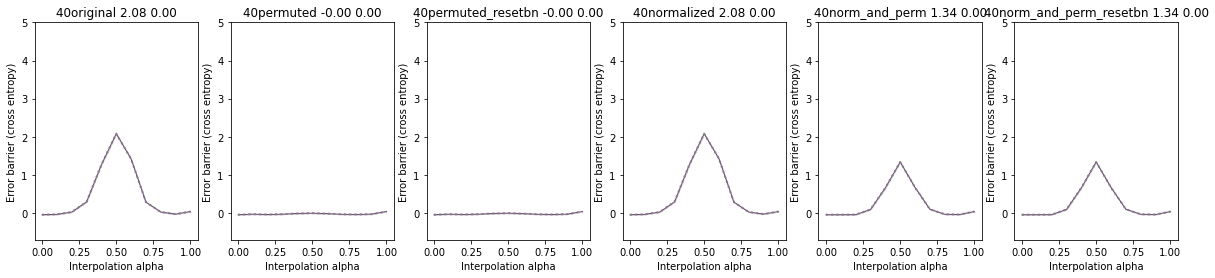

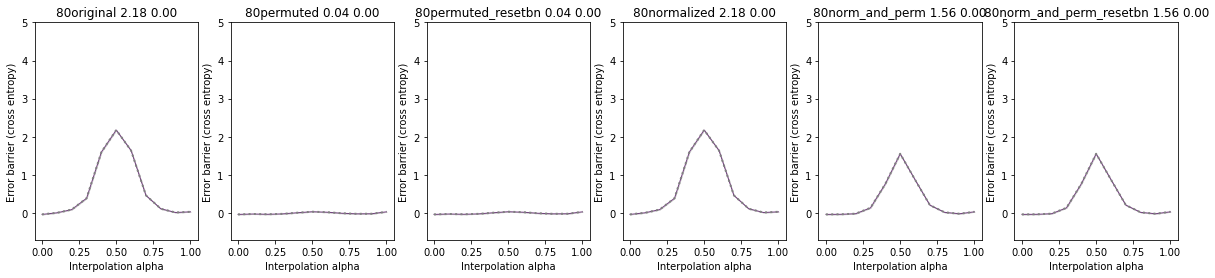

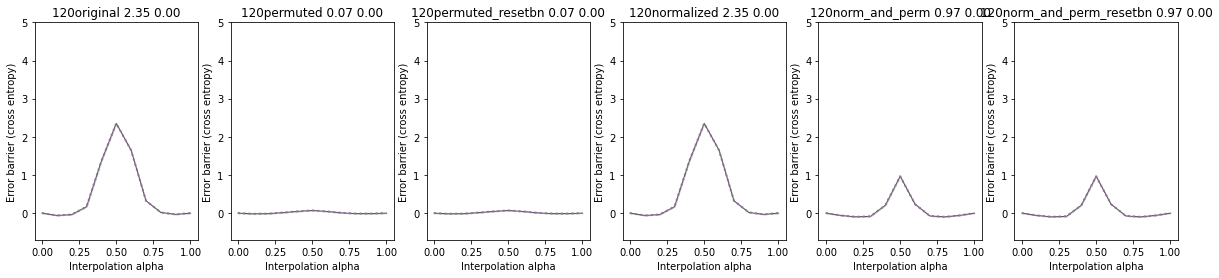

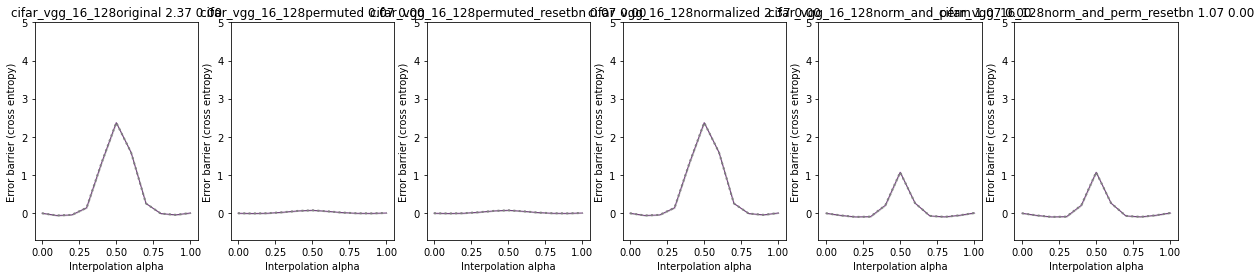

cifar_vgg_16_256
Failed to load outputs/rebasin/exp_1e/False_MSELoss()_1.0_lottery_a309ac4ab15380928661e70ca8b054a1
Failed to load outputs/rebasin/exp_1e/False_MSELoss()_1.0_lottery_a309ac4ab15380928661e70ca8b054a1
Failed to load outputs/rebasin/exp_1e/False_MSELoss()_1.0_lottery_a309ac4ab15380928661e70ca8b054a1
Failed to load outputs/rebasin/exp_1e/False_MSELoss()_1.0_lottery_a309ac4ab15380928661e70ca8b054a1


In [15]:
model_name_to_dir = {
    "cifar_vgg_16_8": "lottery_3d9c91d3d4133cfcdcb2006da1507cbb",
    "cifar_vgg_16_16": "lottery_2915b34d8b29a209ffee2288466cf5f6",
    "cifar_vgg_16_32": "lottery_c855d7c25ffef997a89799dc08931e82",
    "cifar_vgg_16_128": "lottery_8d561a7b273e4d6b2705ba6d627a69bd",
    "cifar_vgg_16_256": "lottery_a309ac4ab15380928661e70ca8b054a1",
}
for name, path in model_name_to_dir.items():
    file = Path("outputs/rebasin/exp_1e/False_MSELoss()_1.0_" + path)
    print(name)
    # plot_from_dir(file, "pretrain", "0", "0", 5)
    plot_from_dir(file, "pretrain", "40", "40", 5)
    plot_from_dir(file, "pretrain", "80", "80", 5)
    plot_from_dir(file, "pretrain", "120", "120", 5)
    plot_from_dir(file, "pretrain", "160", name, 5)

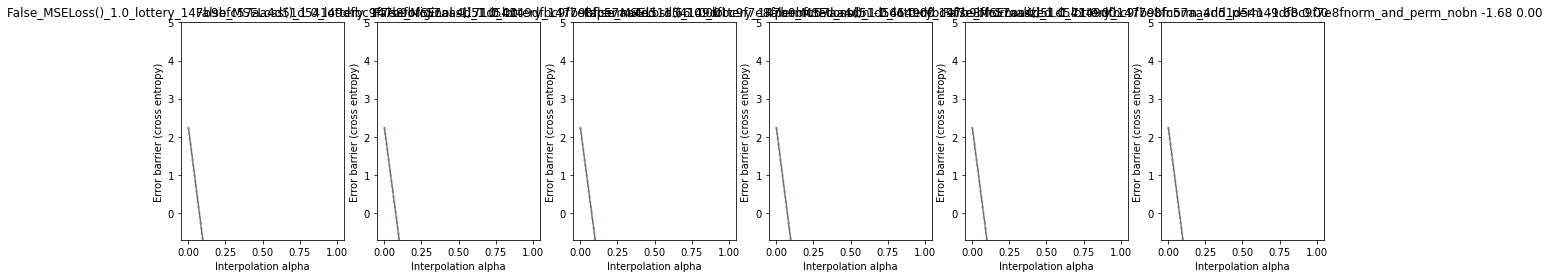

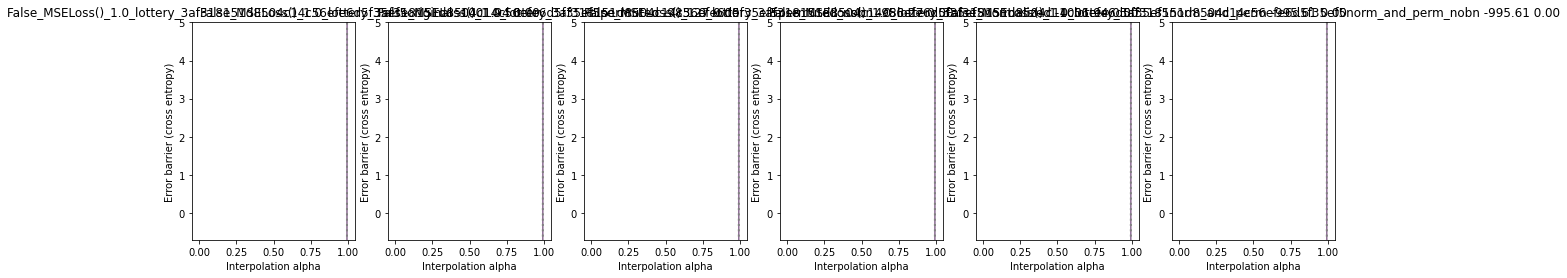

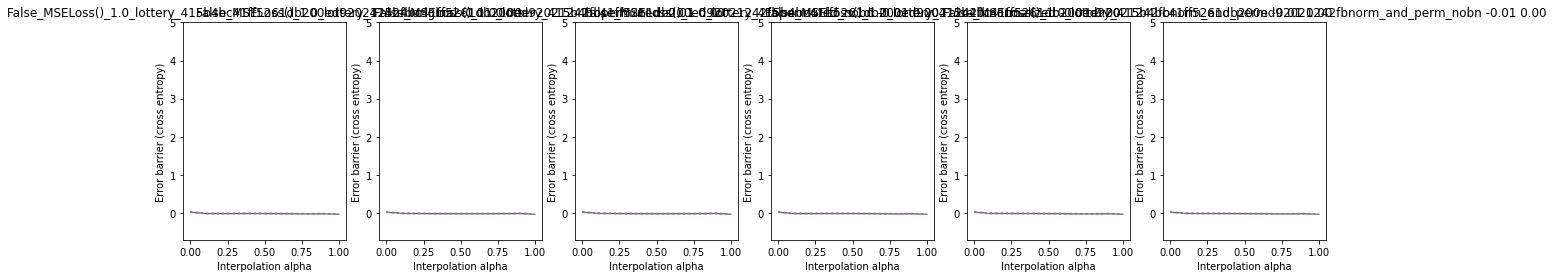

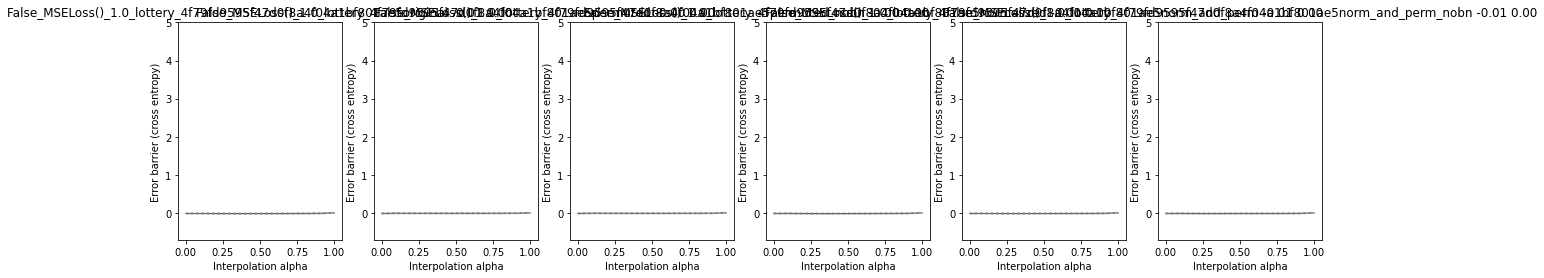

Failed to load outputs/rebasin-nobn/exp_1d/False_MSELoss()_1.0_lottery_7815ff752b40a28901eeda9157edc3a9


In [18]:
for file in Path("outputs/rebasin-nobn/exp_1d/").glob("*"):
    model_dir = str(file).split("/")[-1]
    # plot_from_dir(file, "pretrain", "0", model_dir, 5)
    # plot_from_dir(file, "pretrain", "40", model_dir, 5)
    # plot_from_dir(file, "pretrain", "80", model_dir, 5)
    # plot_from_dir(file, "pretrain", "120", model_dir, 5)
    plot_from_dir(file, "pretrain", "160", model_dir, 5)

4 160
8 160
pretrain 0
outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_453eb807615b16a690fca0a6ca941c57


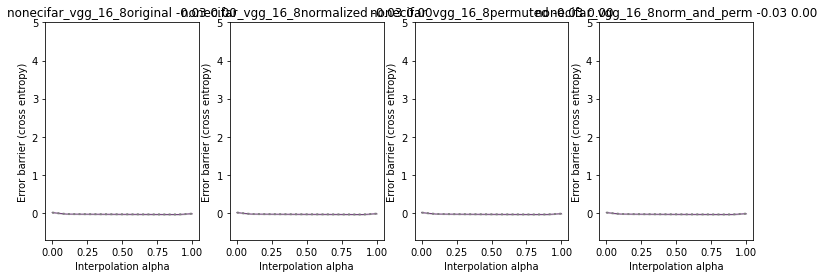

4 160
8 160
pretrain 0
outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_453eb807615b16a690fca0a6ca941c57


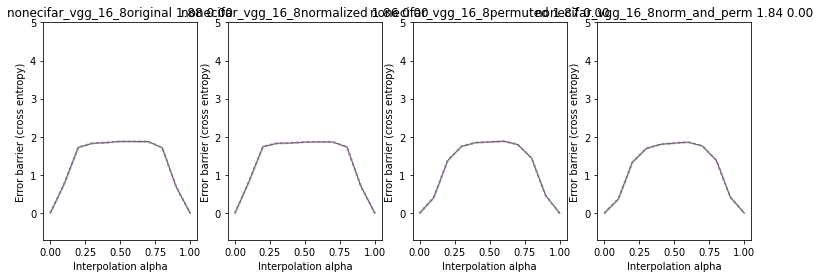

Failed to load outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_c75cc006137d0b9a9be44c8b4f2ef4bb
Failed to load outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_c75cc006137d0b9a9be44c8b4f2ef4bb
4 160
pretrain 0
outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_444f95315c1330543f9221faf493cb1a


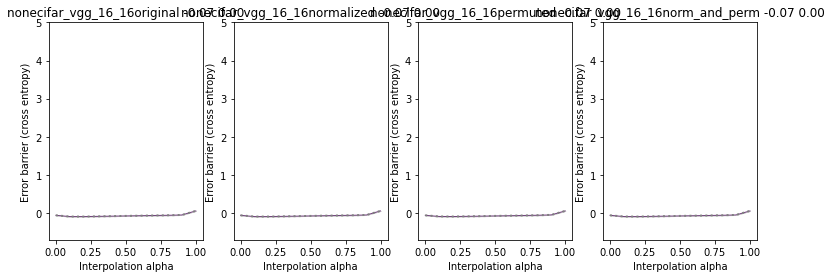

4 160
pretrain 0
outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_444f95315c1330543f9221faf493cb1a


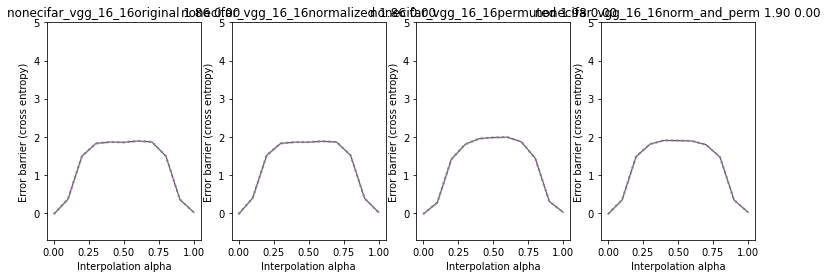

4 160
pretrain 0
outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_d8d275d1b6e0566cf0b3df73deacd6ad


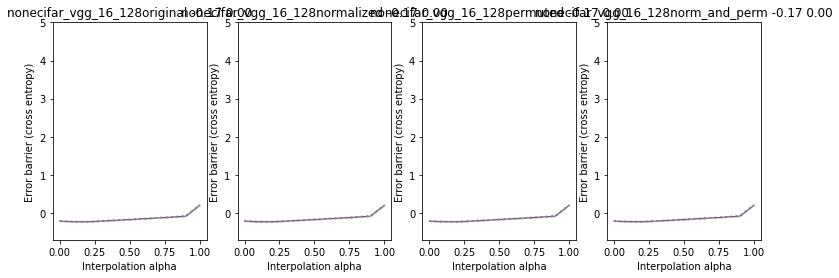

4 160
pretrain 0
outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_d8d275d1b6e0566cf0b3df73deacd6ad


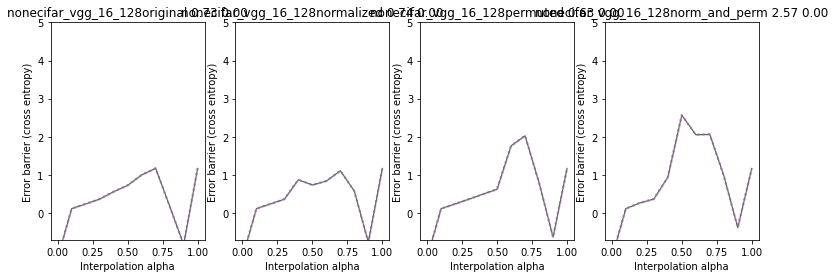

4 160
pretrain 0
outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_6edee361614815c04d791242cbe981ea


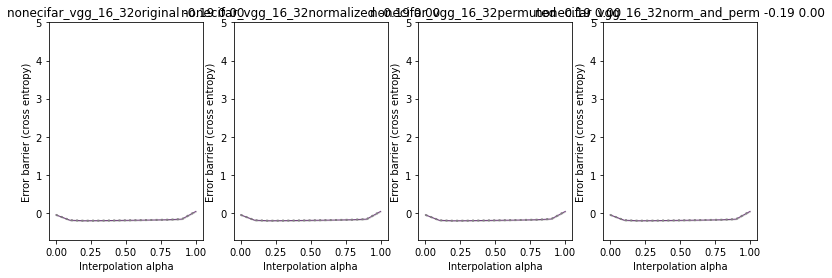

4 160
pretrain 0
outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_6edee361614815c04d791242cbe981ea


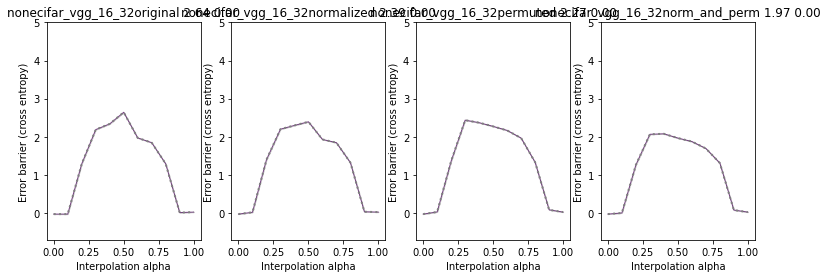

4 160
pretrain 0
outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_64de8dea8cb3aecfb0196adeff94f644


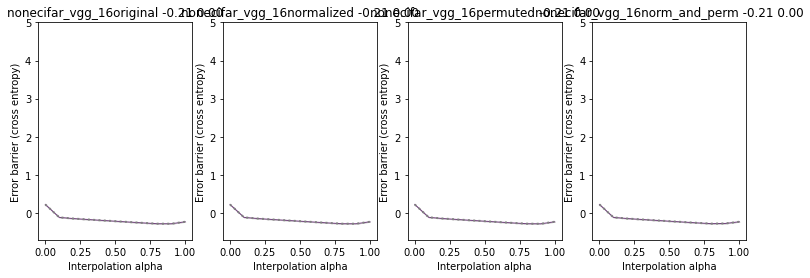

4 160
pretrain 0
outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_64de8dea8cb3aecfb0196adeff94f644


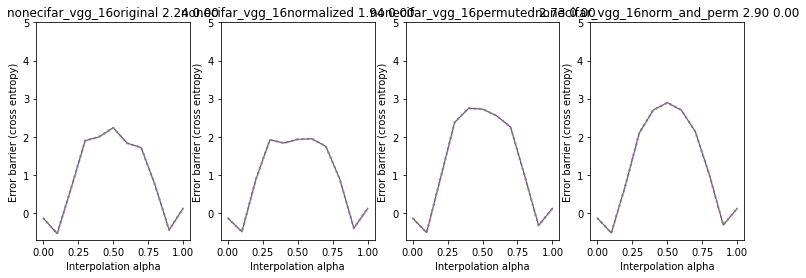

Failed to load outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_4f1179d73eb303281b56f0795dc9def7
Failed to load outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_4f1179d73eb303281b56f0795dc9def7
Failed to load outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_3372810d978476ae9b22102c1d6c2978
Failed to load outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_3372810d978476ae9b22102c1d6c2978
Failed to load outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_ba02b680967534148b52de85bd747445
Failed to load outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_ba02b680967534148b52de85bd747445
Failed to load outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_20816e46eb10c9cac751e7105d7f7148
Failed to load outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_20816e46eb10c9cac751e7105d7f7148
Failed to load outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_755076d601eb9cee690b250a14e9c2d1
Failed to load outputs/rebasin/exp_1c/False_MSELoss()_1.0_lottery_755076d601eb9cee690b250a14e9c2d1
Failed to 

In [9]:
import pandas as pd

hparams = pd.read_csv("outputs/hparams.csv")
hparams = hparams[hparams["model_name"].str.contains("vgg_")]
hparams = hparams[hparams["batchnorm_replace"].str.contains("none") | hparams["batchnorm_replace"].str.contains("bn")]
# using git-rebasin code

for bn, name, model_dir in zip(hparams["batchnorm_replace"], hparams["model_name"], hparams["path"]):
    model_dir = model_dir.split("/")[-1]
    plot_from_dir("outputs/rebasin/exp_1c/False_MSELoss()_1.0_" + model_dir, "pretrain", "0", bn + name, 5)
    plot_from_dir("outputs/rebasin/exp_1c/False_MSELoss()_1.0_" + model_dir, "4", "160", bn + name, 5)

Comparing mlp and vgg (rebasin code is even better at finding permutations)
outputs/rebasin/exp_1/False_MSELoss()_0.0_train_7312e802e619673d23c7a02eba8aee52/


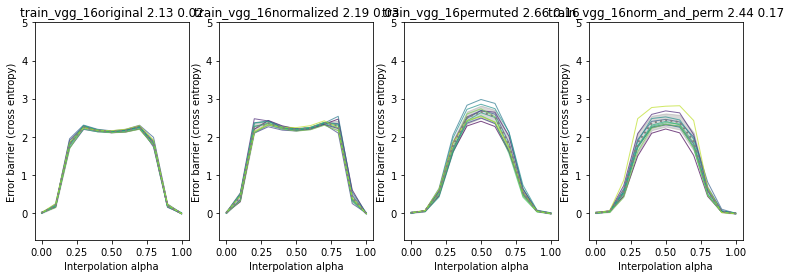

outputs/rebasin/exp_1/False_MSELoss()_0.0_train_574e51abc295d8da78175b320504f2ba/


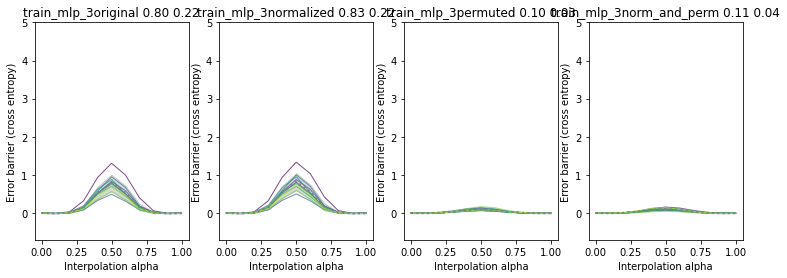

Running vgg of varying width (no effect)
Failed to load outputs/rebasin/exp_1a/False_MSELoss()_1.0_lottery_405df0e1af1fd13b750c0dbb6c92d3a5
outputs/rebasin/exp_1a/False_MSELoss()_1.0_lottery_4d7656b80d72437f584722d51aedd0fc


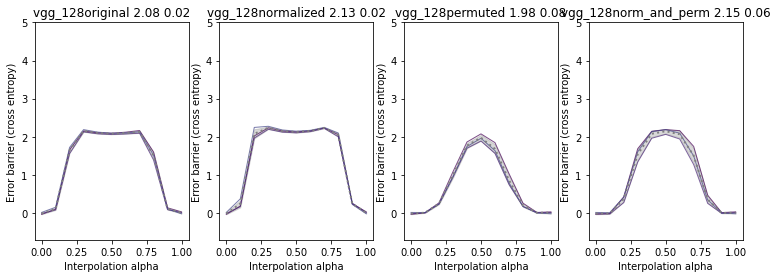

outputs/rebasin/exp_1a/False_MSELoss()_1.0_lottery_06e3ceea2dae7621529556ef969cf803


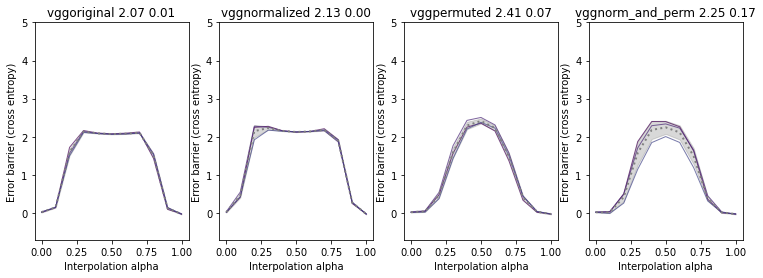

outputs/rebasin/exp_1a/False_MSELoss()_1.0_lottery_c4249732c49350ed79fec7f29d9f6c7e


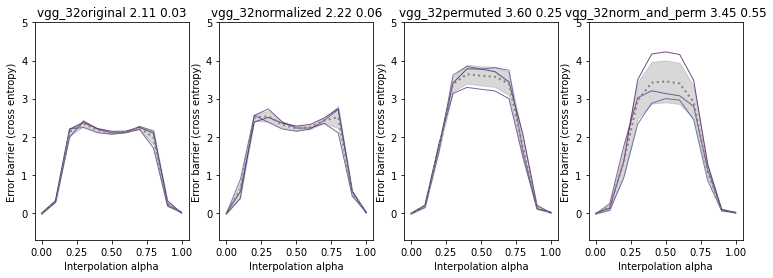

outputs/rebasin/exp_1a/False_MSELoss()_1.0_lottery_b62907fe0a5dc7dc6bcfa22dea75fe21


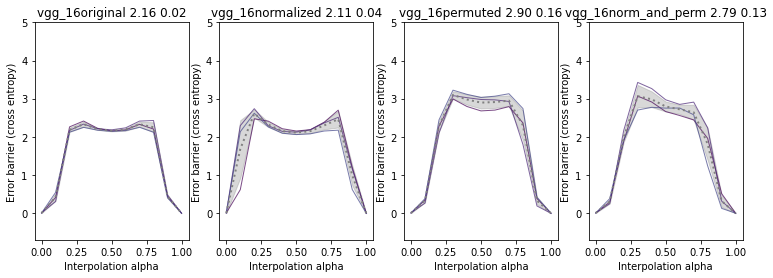

outputs/rebasin/exp_1a/False_MSELoss()_1.0_lottery_bd85f4b553eb07d3e751c7d9bd03b3bc


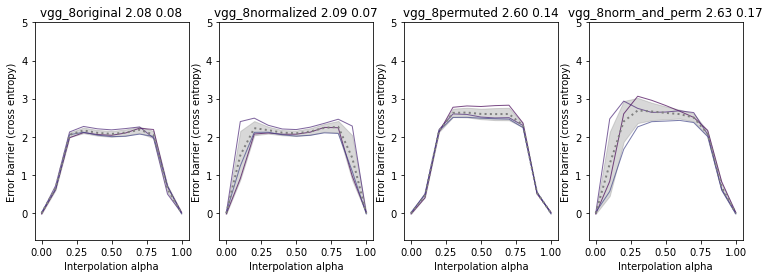

In [14]:
# using git-rebasin code
print("Comparing mlp and vgg (rebasin code is even better at finding permutations)")
model_name_to_dir = {
    "train_vgg_16": "exp_1/False_MSELoss()_0.0_train_7312e802e619673d23c7a02eba8aee52/",
    "train_mlp_3": "exp_1/False_MSELoss()_0.0_train_574e51abc295d8da78175b320504f2ba/",
}
for name, model_dir in model_name_to_dir.items():
    plot_from_dir(out_dir + model_dir, name, 5)

print("Running vgg of varying width (no effect)")
model_name_to_dir = {
    "vgg_256": "lottery_405df0e1af1fd13b750c0dbb6c92d3a5",
    "vgg_128": "lottery_4d7656b80d72437f584722d51aedd0fc",
    "vgg": "lottery_06e3ceea2dae7621529556ef969cf803",
    "vgg_32": "lottery_c4249732c49350ed79fec7f29d9f6c7e",
    "vgg_16": "lottery_b62907fe0a5dc7dc6bcfa22dea75fe21",
    "vgg_8": "lottery_bd85f4b553eb07d3e751c7d9bd03b3bc",
}
for name, model_dir in model_name_to_dir.items():
    plot_from_dir(out_dir + "exp_1a/False_MSELoss()_1.0_" + model_dir, name, 5)

Failed to load outputs/exp_OT_1_norm/False_L1Loss()_0.0_lottery_405df0e1af1fd13b750c0dbb6c92d3a5
outputs/exp_OT_1_norm/False_L1Loss()_0.0_lottery_4d7656b80d72437f584722d51aedd0fc


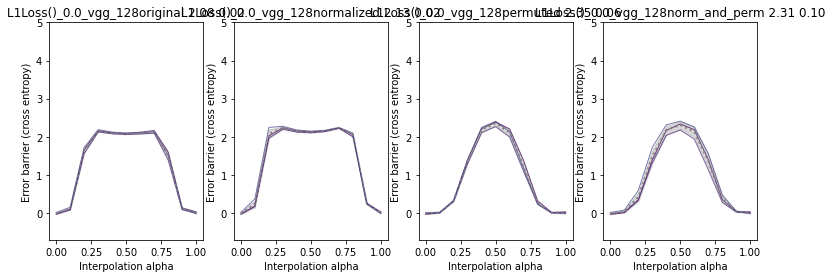

outputs/exp_OT_1_norm/False_L1Loss()_0.0_lottery_06e3ceea2dae7621529556ef969cf803


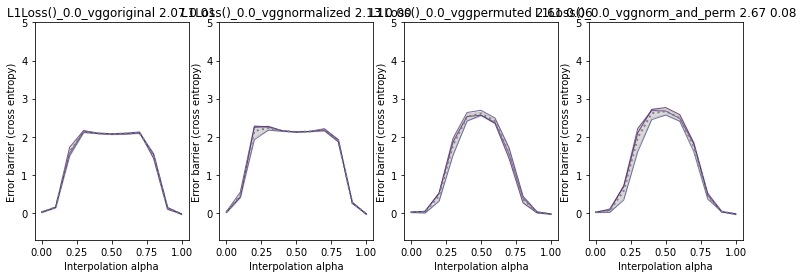

outputs/exp_OT_1_norm/False_L1Loss()_0.0_lottery_c4249732c49350ed79fec7f29d9f6c7e


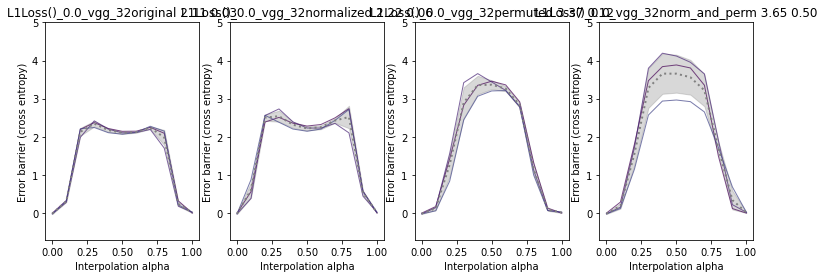

outputs/exp_OT_1_norm/False_L1Loss()_0.0_lottery_b62907fe0a5dc7dc6bcfa22dea75fe21


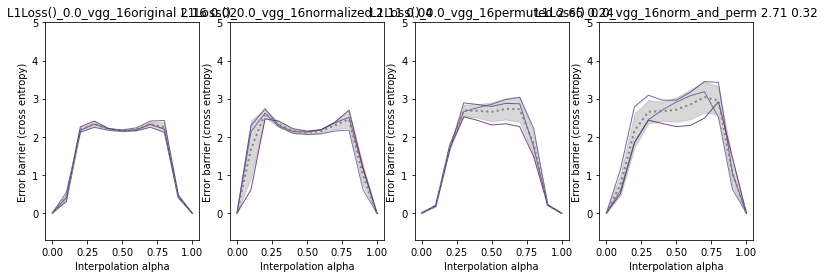

outputs/exp_OT_1_norm/False_L1Loss()_0.0_lottery_bd85f4b553eb07d3e751c7d9bd03b3bc


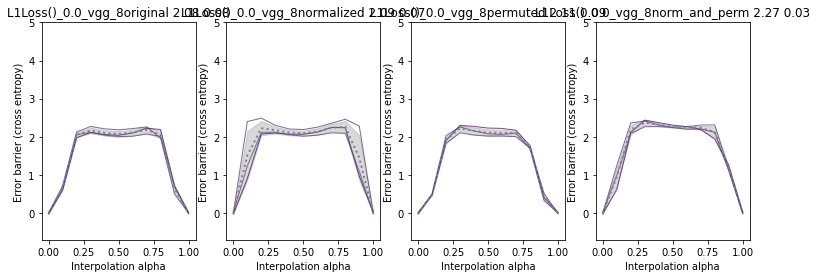

Failed to load outputs/exp_OT_1_norm/False_L1Loss()_1.0_lottery_405df0e1af1fd13b750c0dbb6c92d3a5
Failed to load outputs/exp_OT_1_norm/False_L1Loss()_1.0_lottery_4d7656b80d72437f584722d51aedd0fc
outputs/exp_OT_1_norm/False_L1Loss()_1.0_lottery_06e3ceea2dae7621529556ef969cf803


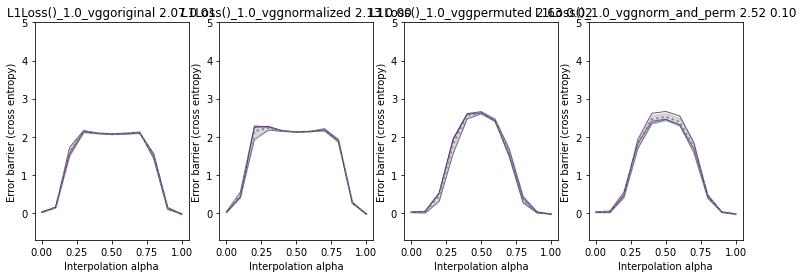

outputs/exp_OT_1_norm/False_L1Loss()_1.0_lottery_c4249732c49350ed79fec7f29d9f6c7e


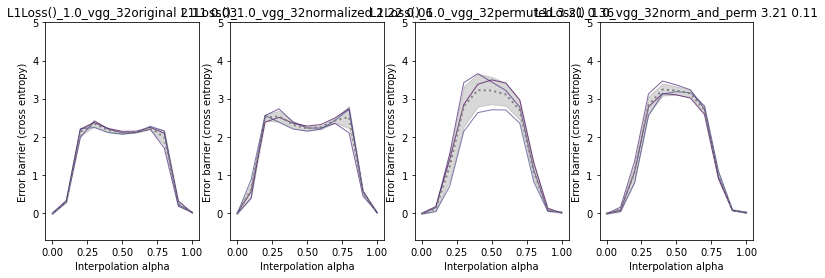

outputs/exp_OT_1_norm/False_L1Loss()_1.0_lottery_b62907fe0a5dc7dc6bcfa22dea75fe21


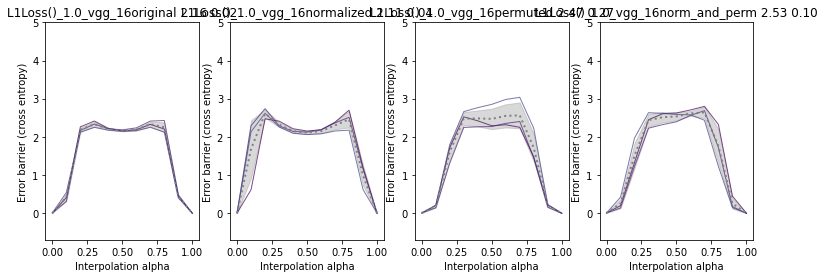

outputs/exp_OT_1_norm/False_L1Loss()_1.0_lottery_bd85f4b553eb07d3e751c7d9bd03b3bc


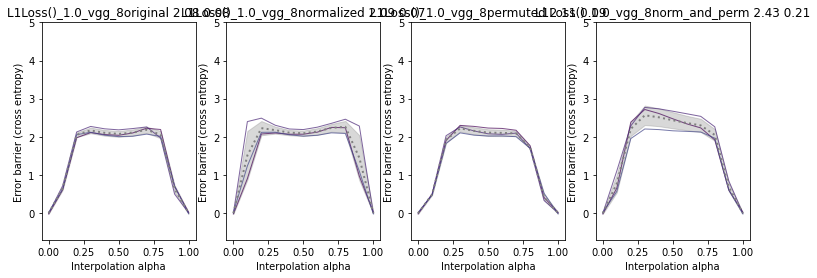

Failed to load outputs/exp_OT_1_norm/False_L1Loss()_10.0_lottery_405df0e1af1fd13b750c0dbb6c92d3a5
Failed to load outputs/exp_OT_1_norm/False_L1Loss()_10.0_lottery_4d7656b80d72437f584722d51aedd0fc
Failed to load outputs/exp_OT_1_norm/False_L1Loss()_10.0_lottery_06e3ceea2dae7621529556ef969cf803
outputs/exp_OT_1_norm/False_L1Loss()_10.0_lottery_c4249732c49350ed79fec7f29d9f6c7e


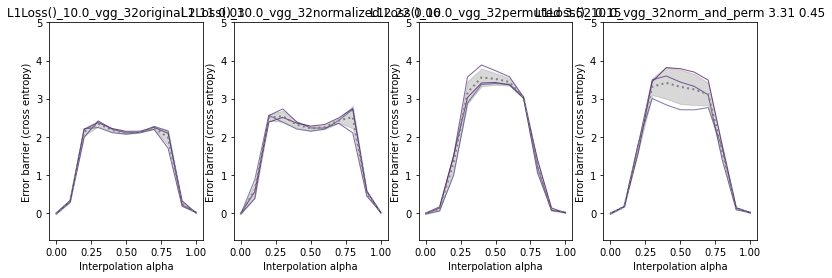

outputs/exp_OT_1_norm/False_L1Loss()_10.0_lottery_b62907fe0a5dc7dc6bcfa22dea75fe21


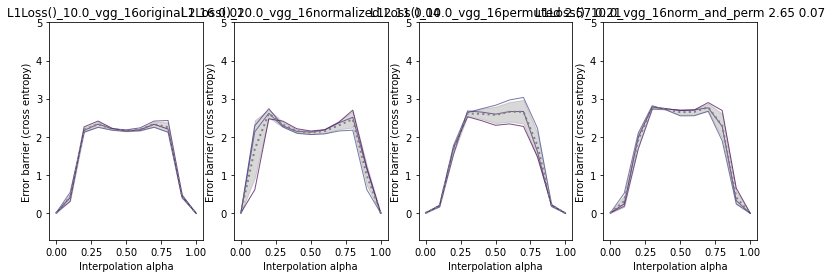

outputs/exp_OT_1_norm/False_L1Loss()_10.0_lottery_bd85f4b553eb07d3e751c7d9bd03b3bc


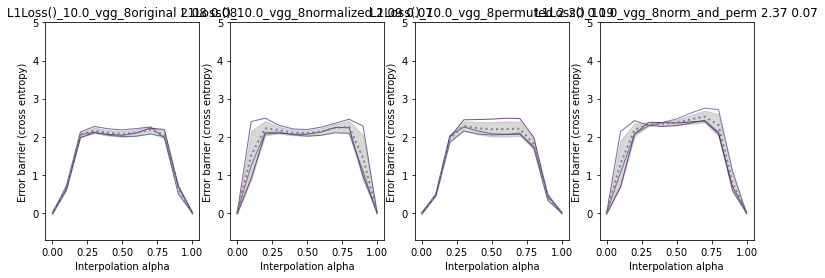

Failed to load outputs/exp_OT_1_norm/False_MSELoss()_0.0_lottery_405df0e1af1fd13b750c0dbb6c92d3a5
Failed to load outputs/exp_OT_1_norm/False_MSELoss()_0.0_lottery_4d7656b80d72437f584722d51aedd0fc
Failed to load outputs/exp_OT_1_norm/False_MSELoss()_0.0_lottery_06e3ceea2dae7621529556ef969cf803
outputs/exp_OT_1_norm/False_MSELoss()_0.0_lottery_c4249732c49350ed79fec7f29d9f6c7e


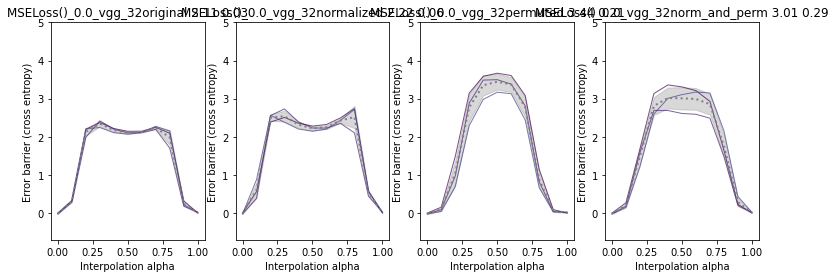

outputs/exp_OT_1_norm/False_MSELoss()_0.0_lottery_b62907fe0a5dc7dc6bcfa22dea75fe21


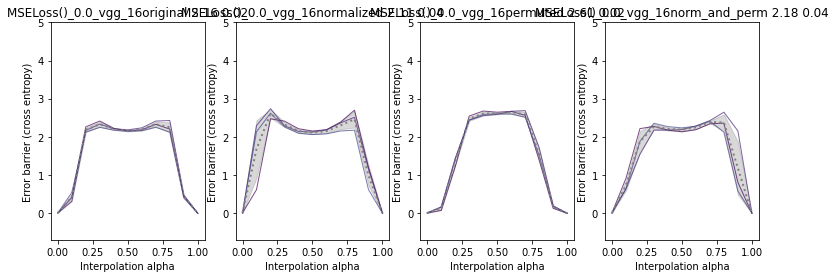

outputs/exp_OT_1_norm/False_MSELoss()_0.0_lottery_bd85f4b553eb07d3e751c7d9bd03b3bc


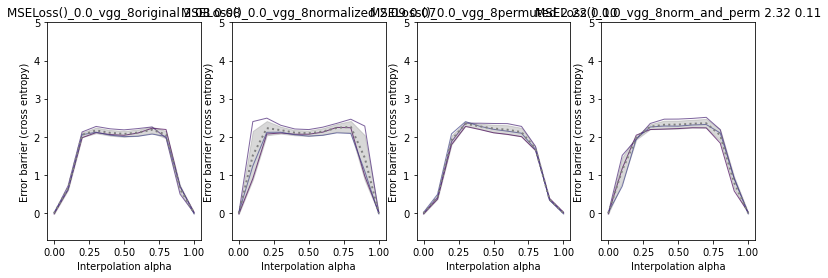

Failed to load outputs/exp_OT_1_norm/False_MSELoss()_1.0_lottery_405df0e1af1fd13b750c0dbb6c92d3a5
Failed to load outputs/exp_OT_1_norm/False_MSELoss()_1.0_lottery_4d7656b80d72437f584722d51aedd0fc
Failed to load outputs/exp_OT_1_norm/False_MSELoss()_1.0_lottery_06e3ceea2dae7621529556ef969cf803
outputs/exp_OT_1_norm/False_MSELoss()_1.0_lottery_c4249732c49350ed79fec7f29d9f6c7e


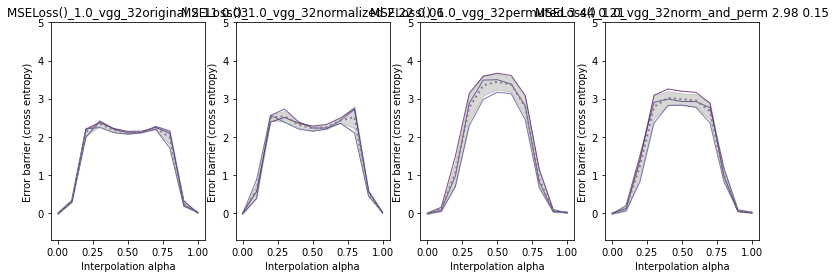

outputs/exp_OT_1_norm/False_MSELoss()_1.0_lottery_b62907fe0a5dc7dc6bcfa22dea75fe21


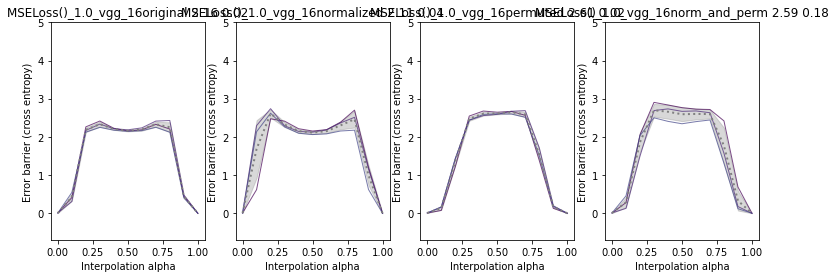

outputs/exp_OT_1_norm/False_MSELoss()_1.0_lottery_bd85f4b553eb07d3e751c7d9bd03b3bc


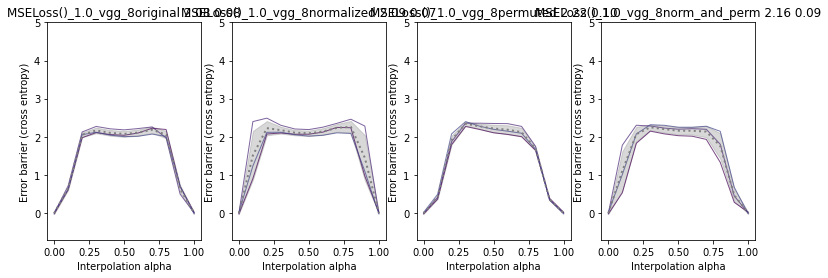

Failed to load outputs/exp_OT_1_norm/False_MSELoss()_10.0_lottery_405df0e1af1fd13b750c0dbb6c92d3a5
Failed to load outputs/exp_OT_1_norm/False_MSELoss()_10.0_lottery_4d7656b80d72437f584722d51aedd0fc
Failed to load outputs/exp_OT_1_norm/False_MSELoss()_10.0_lottery_06e3ceea2dae7621529556ef969cf803
outputs/exp_OT_1_norm/False_MSELoss()_10.0_lottery_c4249732c49350ed79fec7f29d9f6c7e


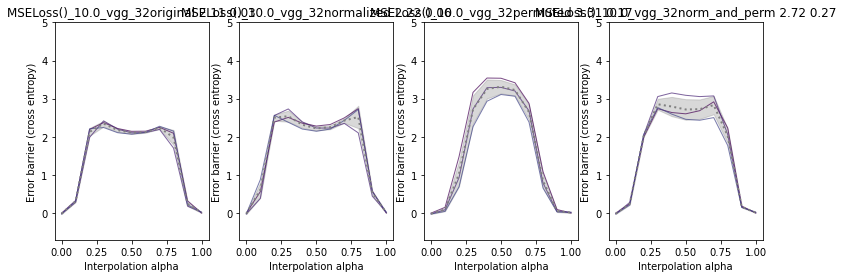

outputs/exp_OT_1_norm/False_MSELoss()_10.0_lottery_b62907fe0a5dc7dc6bcfa22dea75fe21


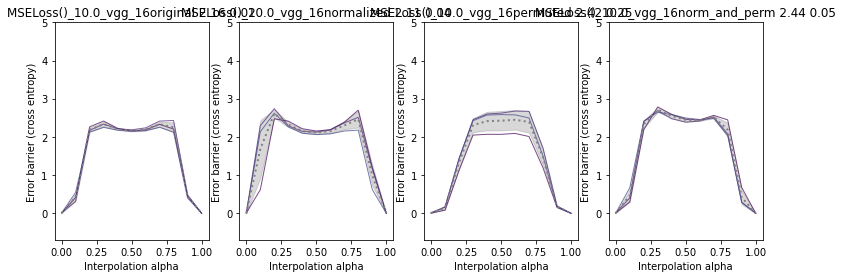

outputs/exp_OT_1_norm/False_MSELoss()_10.0_lottery_bd85f4b553eb07d3e751c7d9bd03b3bc


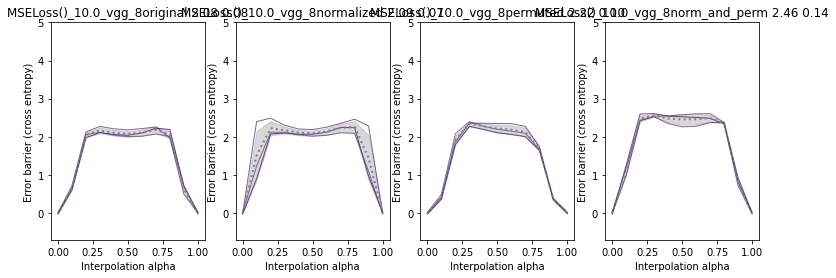

In [10]:
# running with devin/udbhav's permutation code
model_name_to_dir = {
    "vgg_256": "lottery_405df0e1af1fd13b750c0dbb6c92d3a5",
    "vgg_128": "lottery_4d7656b80d72437f584722d51aedd0fc",
    "vgg": "lottery_06e3ceea2dae7621529556ef969cf803",
    "vgg_32": "lottery_c4249732c49350ed79fec7f29d9f6c7e",
    "vgg_16": "lottery_b62907fe0a5dc7dc6bcfa22dea75fe21",
    "vgg_8": "lottery_bd85f4b553eb07d3e751c7d9bd03b3bc",
}
out_dir = "outputs/exp_OT_1_norm/False_"
subdirs = [
    ("L1Loss()_0.0_", 5),
    ("L1Loss()_1.0_", 5),
    ("L1Loss()_10.0_", 5),
    ("MSELoss()_0.0_", 5),
    ("MSELoss()_1.0_", 5),
    ("MSELoss()_10.0_", 5),
]
for d, ymax in subdirs:
    for name, model_dir in model_name_to_dir.items():
        plot_from_dir(out_dir + d + model_dir, d + name, ymax)

outputs/exp_OT_1_norm/5_False_L1Loss()_train_71bc92a970b64a76d7ab7681764b0021


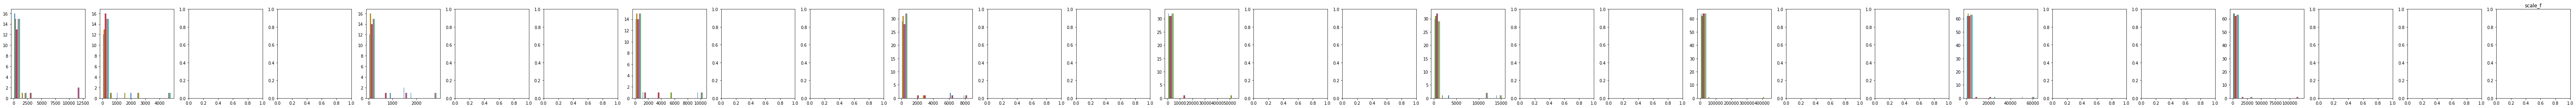

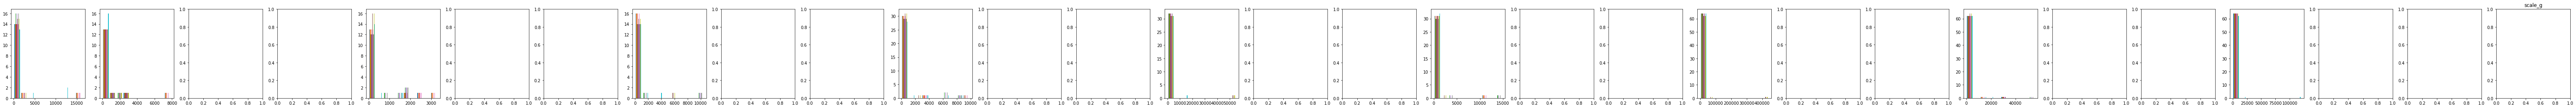

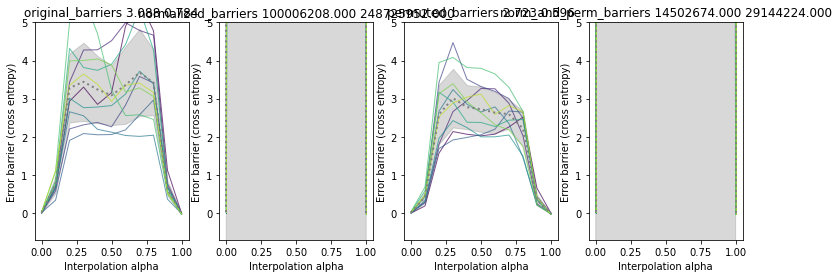

outputs/exp_OT_1_norm/5_False_MSELoss()_train_71bc92a970b64a76d7ab7681764b0021


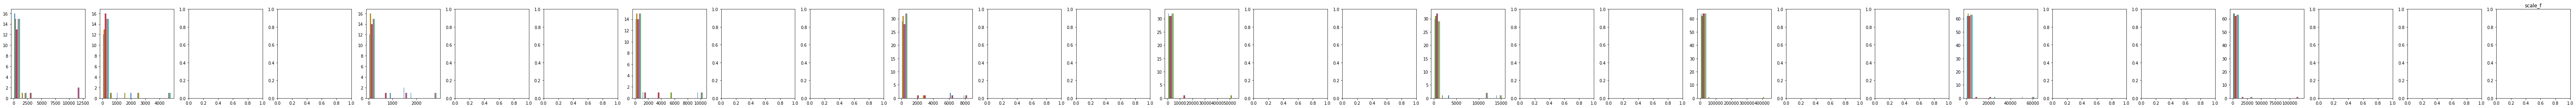

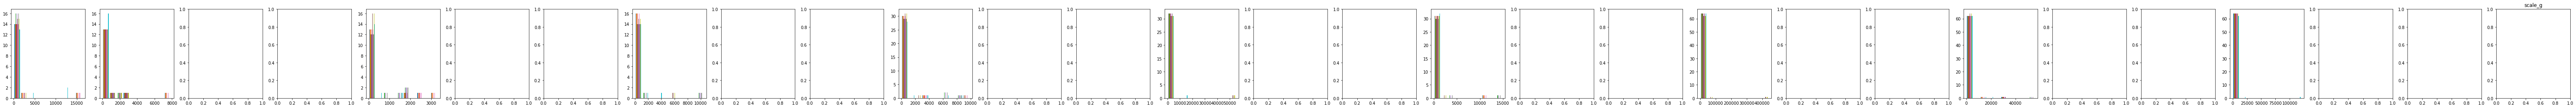

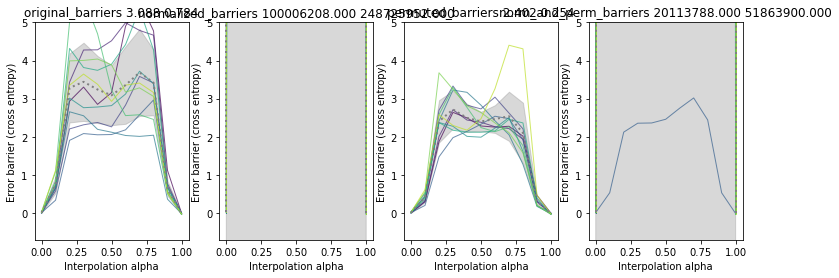

outputs/exp_OT_1_norm/5_False_L1Loss()_train_7312e802e619673d23c7a02eba8aee52


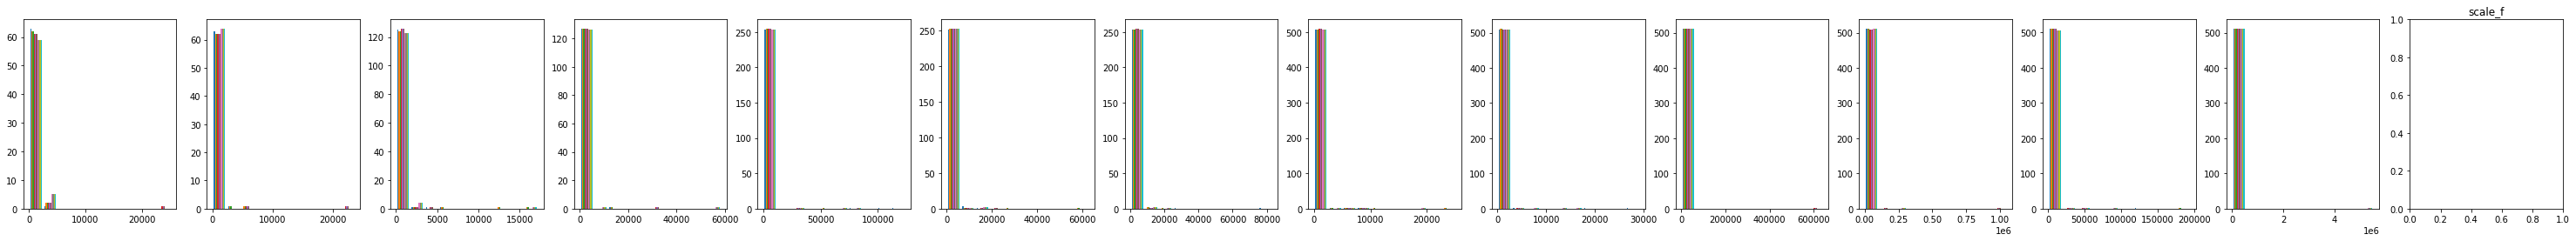

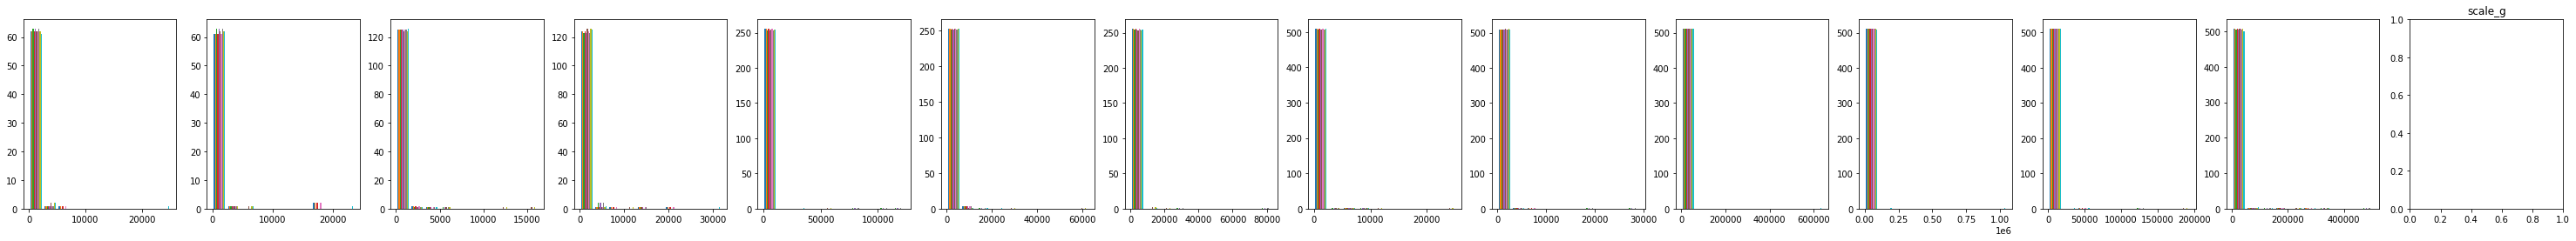

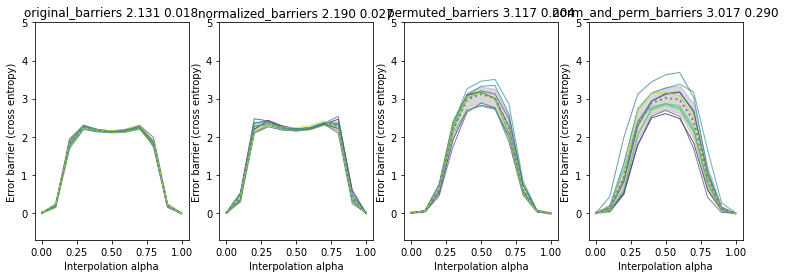

outputs/exp_OT_1_norm/5_False_MSELoss()_train_7312e802e619673d23c7a02eba8aee52


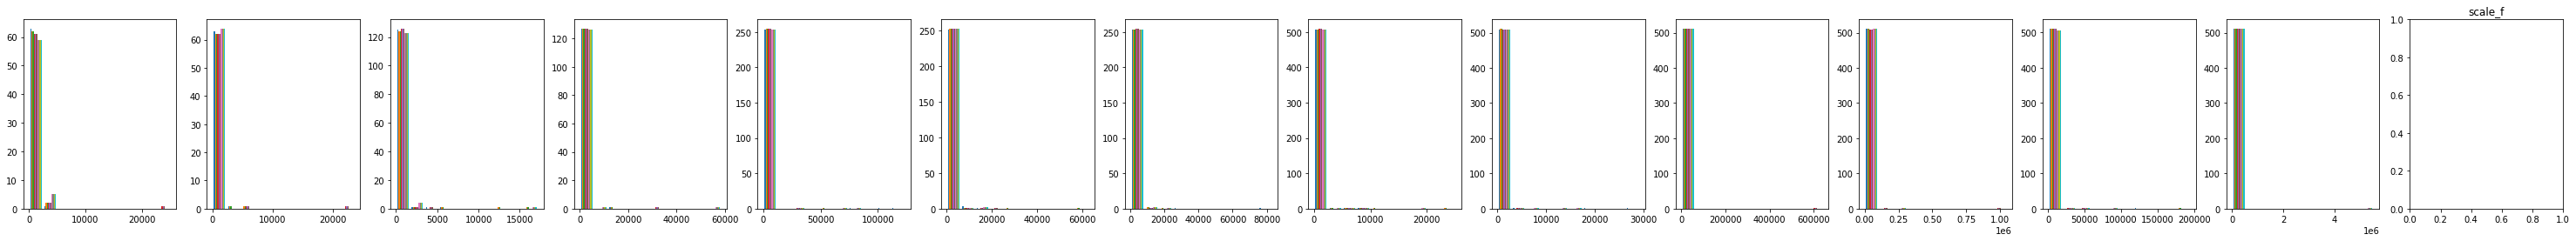

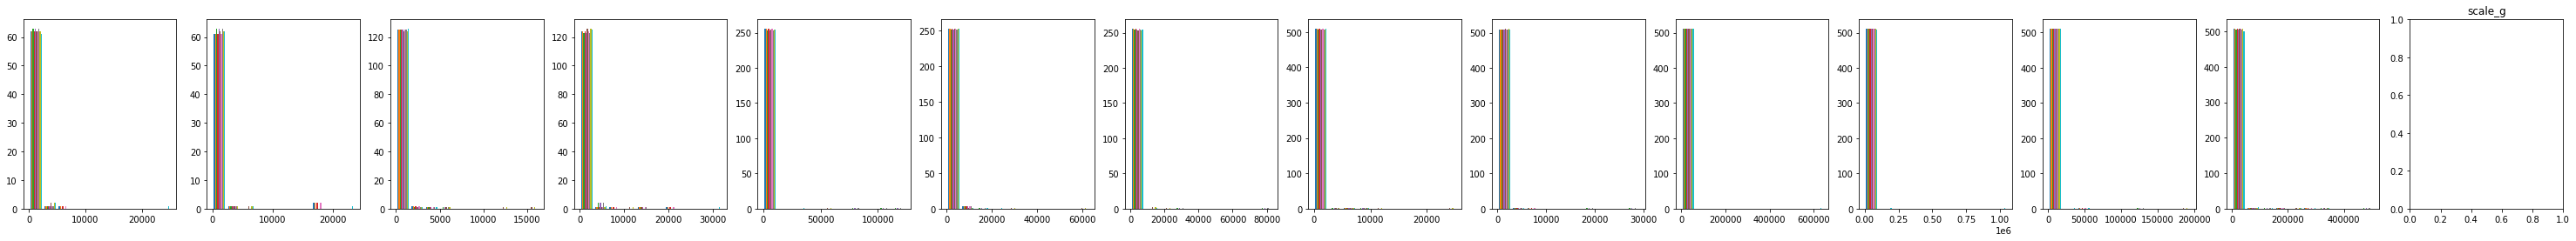

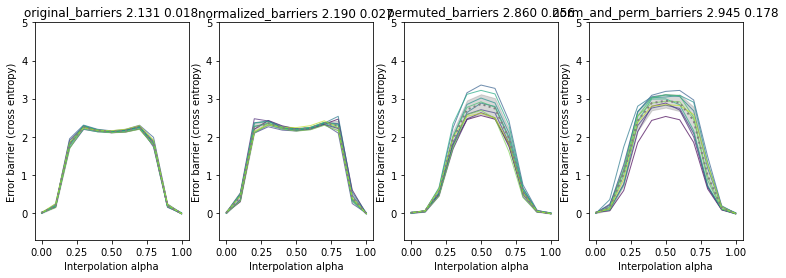

In [7]:
# plot exp 1: change in error barriers after aligning pairs of checkpoints
# for d_ot, d in zip(Path("outputs/exp_OT_1_norm").glob("*"), Path("outputs/exp_1").glob("*")):
#     # print("geom")
#     # plot_from_dir(d)
#     print("OT")
#     plot_from_dir(d_ot)

Failed to load outputs/exp_2/5_False_L1Loss()_1_True_True_0.0_train_7312e802e619673d23c7a02eba8aee52
outputs/exp_2/5_False_L1Loss()_-1_True_True_0.0_train_574e51abc295d8da78175b320504f2ba


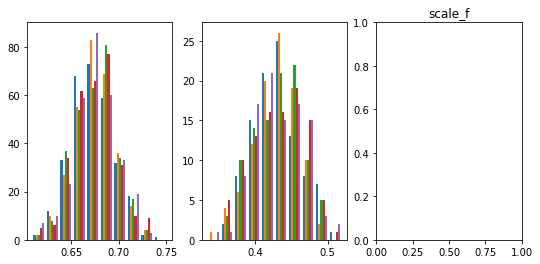

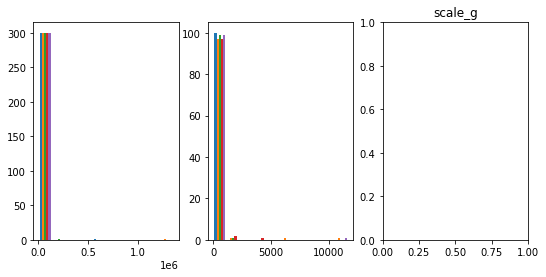

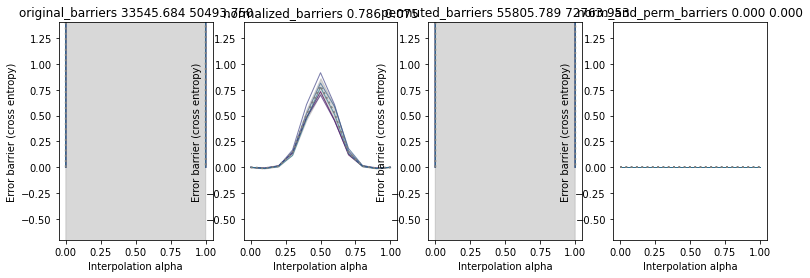

Failed to load outputs/exp_2/5_False_L1Loss()_-1_True_True_0.0_train_7312e802e619673d23c7a02eba8aee52
Failed to load outputs/exp_2/5_False_L1Loss()_-1_True_True_0.0_train_9d0811cc67a44e1ec85e702a5e01570f
outputs/exp_2/5_False_L1Loss()_-1_True_True_0.1_train_574e51abc295d8da78175b320504f2ba


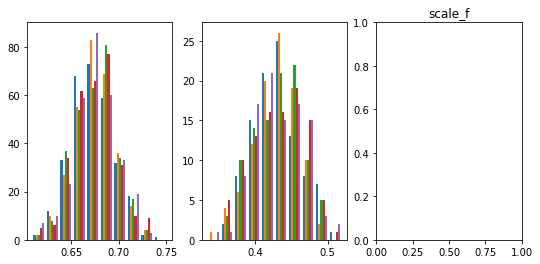

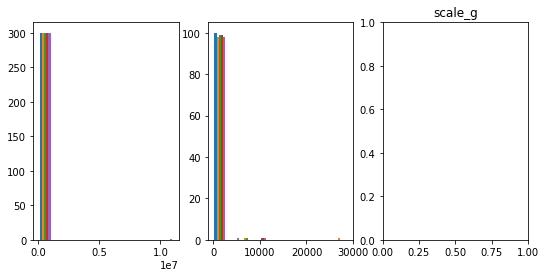

KeyboardInterrupt: 

In [5]:
# plot exp 2: error barriers due to known permutation

# "exp_2/5_False_L1Loss()_-1_True_True_0.1_train_574e51abc295d8da78175b320504f2ba"

for d in Path("outputs/exp_2").glob("*"):
    plot_from_dir(d)

In [3]:
# plot loss for geometric realignment

def plot_loss_over_search(save_dir, max_cols=3):
    values = load_values(Path(d))
    if len(values) == 0:
        print(f"Failed to load {save_dir}")
        return
    print(d)
    losses = {k: v for k, v in values.items() if "loss" in k}
    for k, v in losses.items():
        v = list(zip(*v))
        layers = [np.stack(x, axis=0) for x in v]
        print(k, len(layers), [x.shape for x in layers])
        plt.figure(figsize=(4 * len(layers[0]), 4 * len(layers[:-1])))
        for i, layer in enumerate(layers[:-1]):
            for j, rep in enumerate(layer[:max_cols]):
                plt.subplot(len(layers[:-1]) + 1, len(layer), i * len(layer) + j + 1)
                x = np.arange(len(rep))
                plt.scatter(x, rep, marker=".", s=0.5, alpha=0.2 / math.log(len(rep)), color="black")
                plt.plot(x, np.minimum.accumulate(rep))
        plt.show()

outputs/exp_1/5_11_10000_L1_train_574e51abc295d8da78175b320504f2ba
perm_loss 3 [(10, 614656), (10, 90000), (10,)]


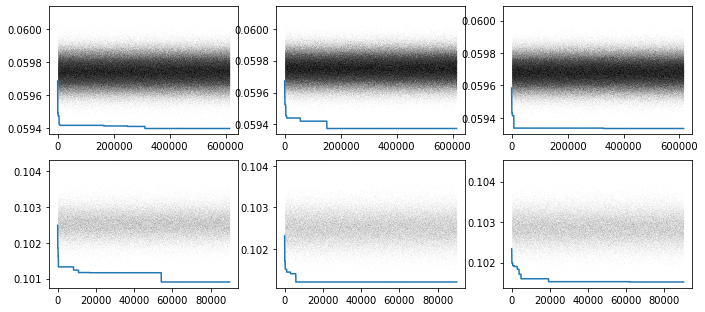

norm_and_perm_loss 3 [(10, 614656), (10, 90000), (10,)]


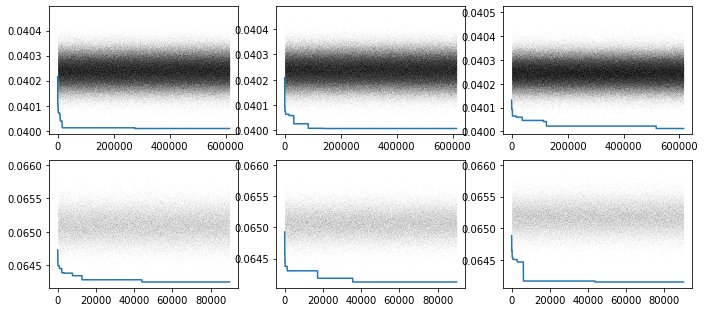

outputs/exp_1/5_11_10000_L1_train_9d0811cc67a44e1ec85e702a5e01570f
perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


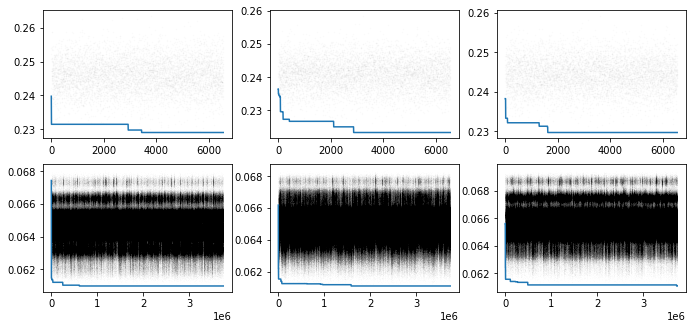

norm_and_perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


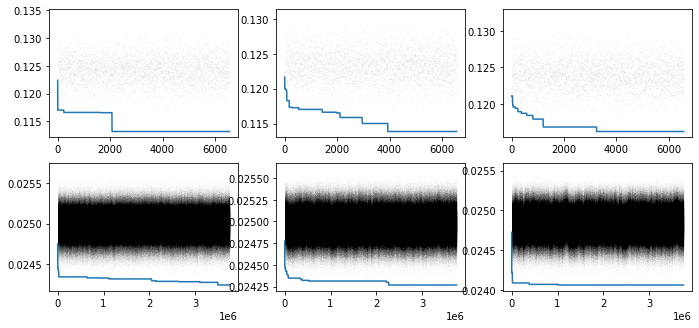

outputs/exp_1/5_11_10000_L2_train_574e51abc295d8da78175b320504f2ba
perm_loss 3 [(10, 614656), (10, 90000), (10,)]


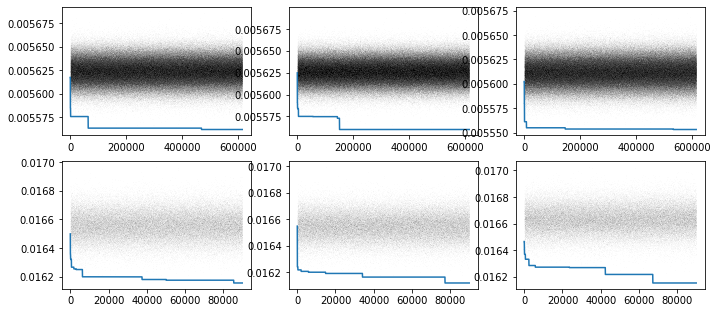

norm_and_perm_loss 3 [(10, 614656), (10, 90000), (10,)]


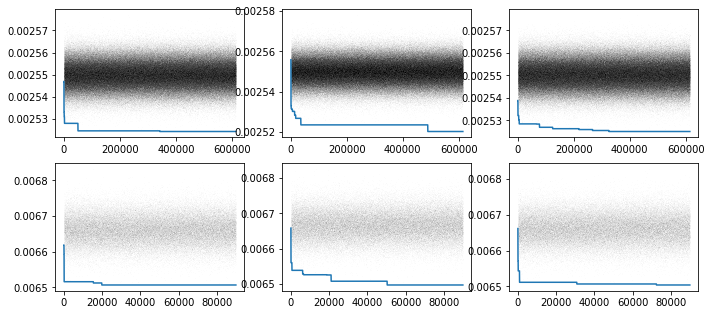

outputs/exp_1/5_11_10000_L2_train_9d0811cc67a44e1ec85e702a5e01570f
perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


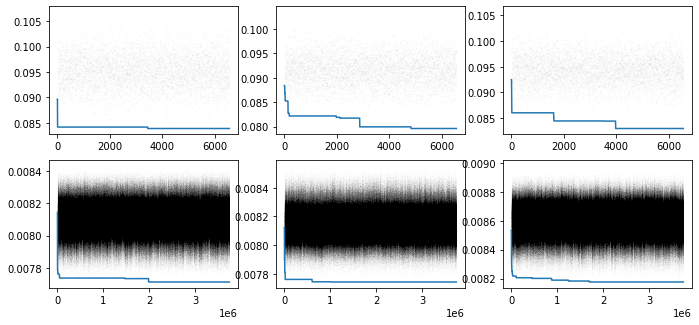

norm_and_perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


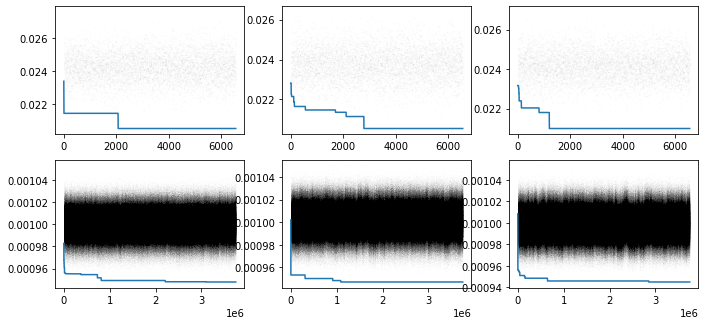

Failed to load outputs/exp_1/5_False_L1Loss()_train_7312e802e619673d23c7a02eba8aee52
Failed to load outputs/exp_1/5_False_MSELoss()_train_7312e802e619673d23c7a02eba8aee52


In [6]:
for d in Path("outputs/exp_1").glob("*"):
    plot_loss_over_search(d)

outputs/exp_1/5_11_10000_L1_train_574e51abc295d8da78175b320504f2ba
perm_loss 3 [(10, 614656), (10, 90000), (10,)]


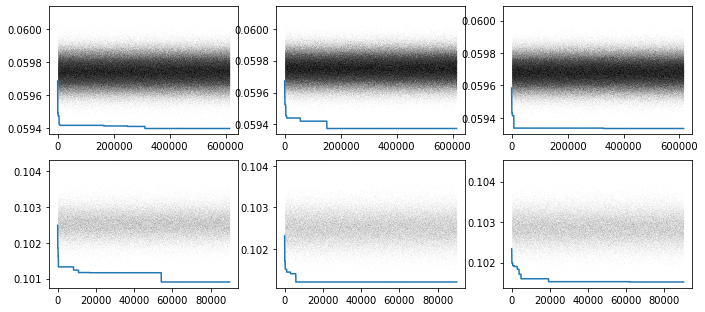

norm_and_perm_loss 3 [(10, 614656), (10, 90000), (10,)]


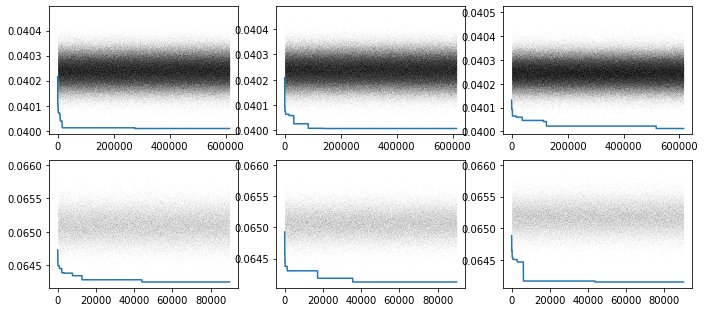

outputs/exp_1/5_11_10000_L1_train_9d0811cc67a44e1ec85e702a5e01570f
perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


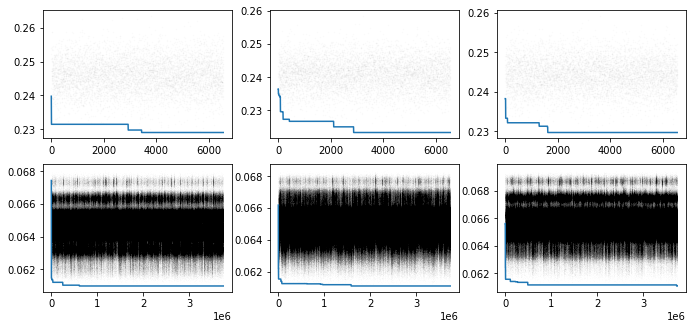

norm_and_perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


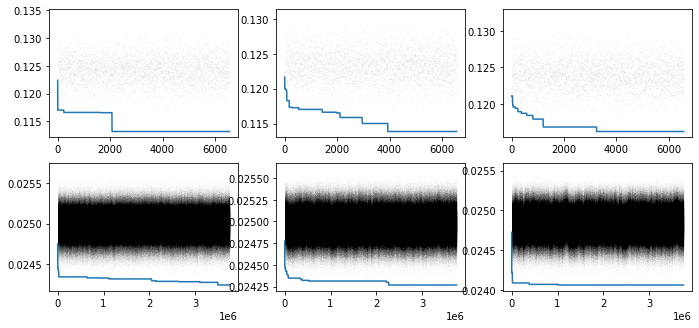

outputs/exp_1/5_11_10000_L2_train_574e51abc295d8da78175b320504f2ba
perm_loss 3 [(10, 614656), (10, 90000), (10,)]


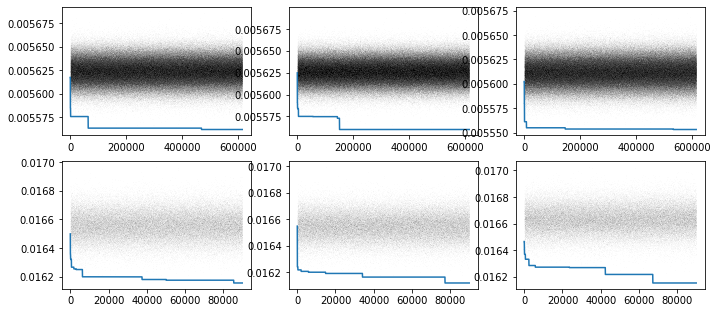

norm_and_perm_loss 3 [(10, 614656), (10, 90000), (10,)]


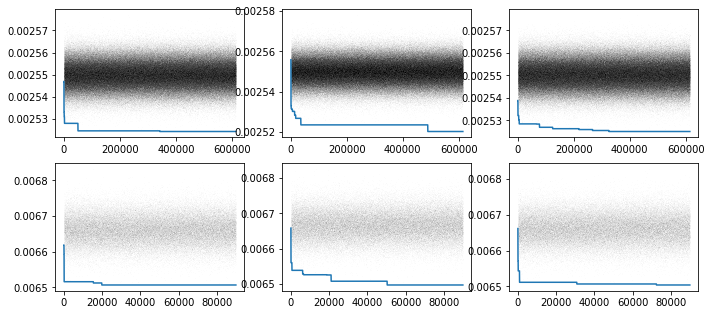

outputs/exp_1/5_11_10000_L2_train_9d0811cc67a44e1ec85e702a5e01570f
perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


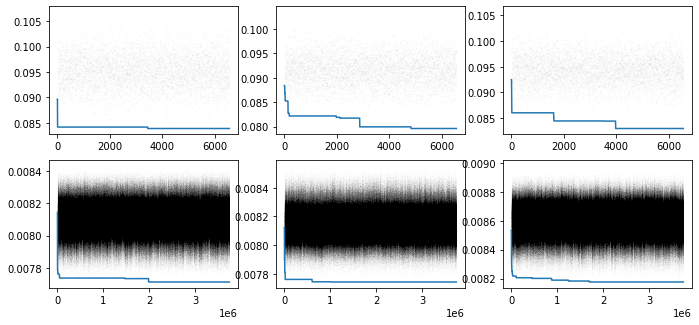

norm_and_perm_loss 3 [(10, 6561), (10, 3748096), (10,)]


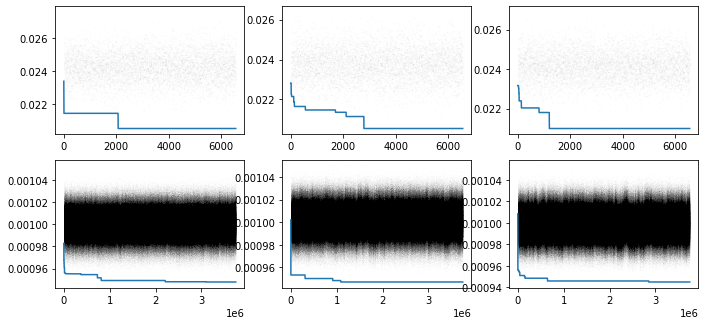

Failed to load outputs/exp_1/5_False_L1Loss()_train_7312e802e619673d23c7a02eba8aee52
Failed to load outputs/exp_1/5_False_MSELoss()_train_7312e802e619673d23c7a02eba8aee52


In [4]:
# plot loss for geometric realignment
for d in Path("outputs/exp_1").glob("*"):
    plot_loss_over_search(d)

In [ ]:
# baseline error between non-aligned layers
#TODO